<a href="https://colab.research.google.com/github/donatgithub12/cardiomegaly/blob/main/cardiomegaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES

In [ ]:
import os  # for accessing files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2  # for image prosessing
from google.colab.patches import cv2_imshow
from PIL import Image #PIL -> pillow libary used for image processing libraries
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 #extracting the compessed Dataset
from zipfile import ZipFile
dataset='/content/drive/MyDrive/cardiomegaly.zip'

with ZipFile(dataset,'r') as zip:  # r for reading the file
  zip.extractall()
  print('the dataset is extacted')

the dataset is extacted


In [ ]:
with_mask_files=os.listdir('/content/data/true_cardiomegaly') # create list contain files with mask
print(with_mask_files[:5])  # print the first five elements
print(with_mask_files[-5:]) # print the last five elements of the list

['1301.png', '188.png', '190.png', 'test_true (70).png', '912.png']
['978.png', '1066.png', '1028.png', 'test_true (156).png', '1849.png']


In [ ]:
without_mask_files=os.listdir('/content/data/false_cardiomegaly') # create list contain files without mask
print(without_mask_files[:5])  # print the first five elements
print(without_mask_files[-5:])  # print the last five elements of the list

['1301.png', 'test_false (469).png', '188.png', '190.png', 'test_false (422).png']
['1391.png', '978.png', '1066.png', '1028.png', '1849.png']


In [ ]:
print('Number of true cardiomegaly images:',len(with_mask_files))
print('number of false cardiomegaly images:', len(without_mask_files))

Number of true cardiomegaly images: 2776
number of false cardiomegaly images: 2776


Creating lables for the two class of images

with masks-> 0


withoutmask -> 1


In [ ]:
#creating the labels
with_mask_labels = [0]*2776
without_mask_labels = [1]*2776

In [ ]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

2776
2776


In [ ]:
labels = with_mask_labels + without_mask_labels # adding the to list

print(len(labels))
print(labels[0:5])
print(labels[-5:])

5552
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


Displaying the images


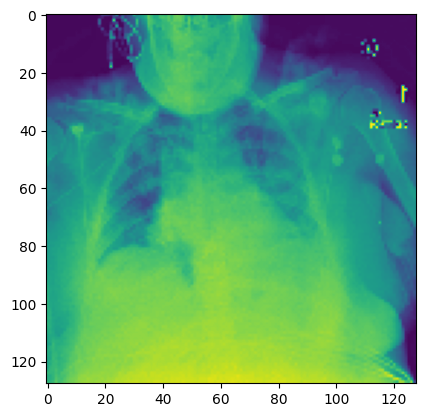

In [ ]:
# dispolaying with mask image
img=mpimg.imread('/content/data/true_cardiomegaly/1.png') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

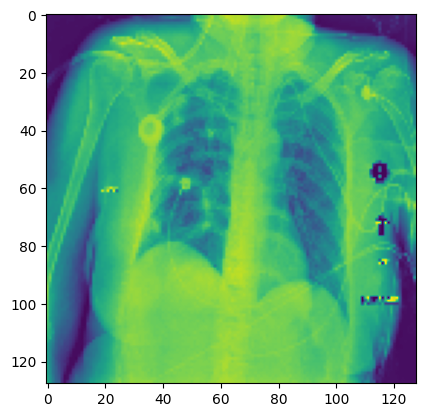

In [ ]:
#displaying without mask image
img = mpimg.imread('/content/data/false_cardiomegaly/1.png')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the images

image processing

1.Resize the images


2.Convert the images to numpy arrays

In [ ]:
#convert images to numpy arrays
with_mask_path = '/content/data/true_cardiomegaly/' # don't forgot to add /
data = [] # create a empty list


for img_file in os.listdir(with_mask_path): #Iterate over files in the "with_mask_path" directory
    img_path = os.path.join(with_mask_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(with_mask_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data


In [ ]:
without_mask_path = '/content/data/false_cardiomegaly/'
for img_file in os.listdir(without_mask_path): #Iterate over files in the "with_mask_path" directory
    img_path = os.path.join(without_mask_path ,img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(without_mask_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data


array([[[ 43,  43,  43],
        [ 39,  39,  39],
        [ 37,  37,  37],
        ...,
        [ 48,  48,  48],
        [ 54,  54,  54],
        [ 58,  58,  58]],

       [[ 41,  41,  41],
        [ 37,  37,  37],
        [ 37,  37,  37],
        ...,
        [ 37,  37,  37],
        [ 39,  39,  39],
        [ 43,  43,  43]],

       [[ 41,  41,  41],
        [ 37,  37,  37],
        [ 37,  37,  37],
        ...,
        [ 35,  35,  35],
        [ 37,  37,  37],
        [ 39,  39,  39]],

       ...,

       [[ 31,  31,  31],
        [ 27,  27,  27],
        [ 27,  27,  27],
        ...,
        [118, 118, 118],
        [ 87,  87,  87],
        [ 19,  19,  19]],

       [[ 35,  35,  35],
        [ 33,  33,  33],
        [ 31,  31,  31],
        ...,
        [116, 116, 116],
        [ 75,  75,  75],
        [ 19,  19,  19]],

       [[ 47,  47,  47],
        [ 44,  44,  44],
        [ 42,  42,  42],
        ...,
        [120, 120, 120],
        [ 71,  71,  71],
        [ 22,  22,  22]]], dtype=uint8)
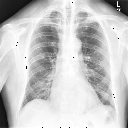

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
Y

array([0, 0, 0, ..., 1, 1, 1])

Train test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, x_train.shape, x_test.shape)

(5552, 128, 128, 3) (4441, 128, 128, 3) (1111, 128, 128, 3)


In [ ]:
#scaling the data

x_train_scaled =  x_train/255   #to change the value from 0 to 1


x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.06666667, 0.06666667, 0.06666667],
        [0.06666667, 0.06666667, 0.06666667],
        [0.06666667, 0.06666667, 0.06666667],
        ...,
        [0.09411765, 0.09411765, 0.09411765],
        [0.09411765, 0.09411765, 0.09411765],
        [0.09411765, 0.09411765, 0.09411765]],

       [[0.06666667, 0.06666667, 0.06666667],
        [0.06666667, 0.06666667, 0.06666667],
        [0.06666667, 0.06666667, 0.06666667],
        ...,
        [0.09411765, 0.09411765, 0.09411765],
        [0.09411765, 0.09411765, 0.09411765],
        [0.09411765, 0.09411765, 0.09411765]],

       [[0.06666667, 0.06666667, 0.06666667],
        [0.06666667, 0.06666667, 0.06666667],
        [0.06666667, 0.06666667, 0.06666667],
        ...,
        [0.09411765, 0.09411765, 0.09411765],
        [0.09411765, 0.09411765, 0.09411765],
        [0.09411765, 0.09411765, 0.09411765]],

       ...,

       [[0.24705882, 0.24705882, 0.24705882],
        [0.23137255, 0.23137255, 0.23137255],
        [0.21568627, 0

Building a convolutional Netural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
#compile the nerual network
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['acc'])

In [ ]:
#training the neural network
history = model.fit(x_train_scaled,y_train, validation_split=0.1, epochs=5)

Epoch 1/5
125/125 [==============================] - 111s 882ms/step - loss: 0.7102 - acc: 0.5388 - val_loss: 0.6620 - val_acc: 0.6000
Epoch 2/5
125/125 [==============================] - 112s 896ms/step - loss: 0.6698 - acc: 0.5891 - val_loss: 0.6683 - val_acc: 0.5798
Epoch 3/5
125/125 [==============================] - 108s 867ms/step - loss: 0.6278 - acc: 0.6441 - val_loss: 0.6319 - val_acc: 0.6112
Epoch 4/5
125/125 [==============================] - 113s 903ms/step - loss: 0.5784 - acc: 0.6962 - val_loss: 0.6078 - val_acc: 0.6472
Epoch 5/5
125/125 [==============================] - 111s 890ms/step - loss: 0.5258 - acc: 0.7280 - val_loss: 0.6009 - val_acc: 0.6719


model evaluation

In [ ]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy= ', accuracy)

35/35 [==============================] - 9s 270ms/step - loss: 0.6091 - acc: 0.6769
Test Accuracy=  0.676867663860321


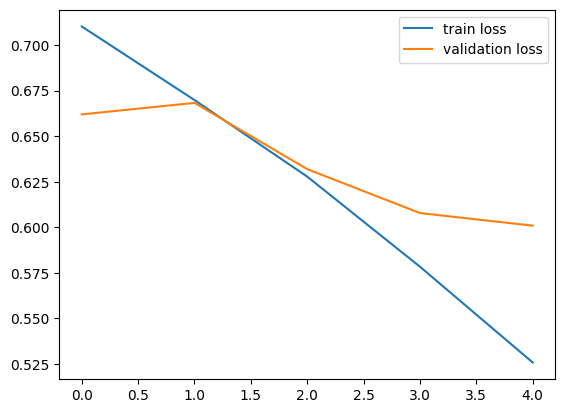

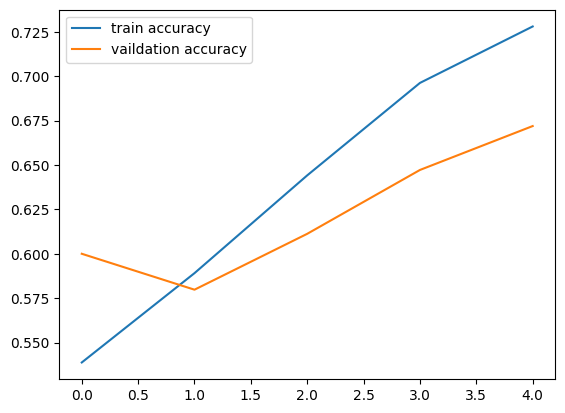

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='vaildation accuracy')
plt.legend()
plt.show()

predictive System

path of the image to be pedicted: /content/data/true_cardiomegaly/1002.png


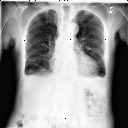

1/1 [==============================] - 0s 53ms/step
[[0.48900023 0.20281933]]
0
The person has cardiomegaly


In [ ]:
# @title Default title text
input_image_path = input('path of the image to be pedicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person has no cardiomegaly')

else:
  print('The person has cardiomegaly')